<a href="https://colab.research.google.com/github/xhxuciedu/CS206/blob/master/Rosenbrock_steepest_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import matplotlib.pylab as plt
import numpy as np


Consider the Rosenbrock function
$$f(x,y)=10(y-x^2)^2 + (1-x)^2$$
with gradient
$$\nabla f = \left[\begin{array}{c}
40x^3 - 40xy +2x - 2 \\\
20(y-x^2)
\end{array}\right]$$
and Hessian
$$\nabla^2 f = \left[
\begin{array}{c}
120x^2-40y+2 & -40x \\\
-40x & 20
\end{array}\right]$$
The only minimum is at $(x,y)=(1,1)$ where $f(1,1)=0$.

In [26]:
def objfun(x,y):
    return 10*(y-x**2)**2 + (1-x)**2
def gradient(x,y):
    return np.array([-40*x*y + 40*x**3 -2 + 2*x, 20*(y-x**2)])
def hessian(x,y):
    return np.array([[120*x*x - 40*y+2, -40*x],[-40*x, 20]])

In [27]:
# def objfun(x,y):
#     return P[0,0]*x**2/2+P[1,1]*y**2/2+P[0,1]*x*y
# def gradient(x,y):
#     v = np.array([x,y]).T
#     return P.dot(v)
# def hessian(x,y):
#     return P


Create a utility function that plots the contours of the Rosenbrock function.

In [28]:
def contourplot(objfun, xmin, xmax, ymin, ymax, ncontours=50, fill=True):

    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x,y)
    Z = objfun(X,Y)
    if fill:
        plt.contourf(X,Y,Z,ncontours); # plot the contours
    else:
        plt.contour(X,Y,Z,ncontours); # plot the contours
    plt.scatter(0,0,marker="x",s=50,color="r");  # mark the minimum

Here is a contour plot of the Rosenbrock function, with the global minimum marked with a red cross.

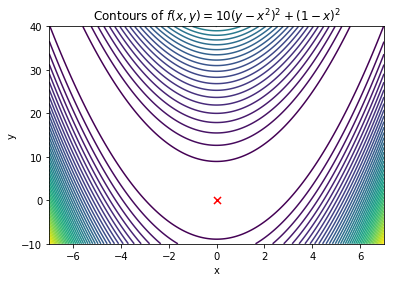

In [30]:
contourplot(objfun, -7,7, -10, 40, fill=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contours of $f(x,y)=10(y-x^2)^2 + (1-x)^2$");

# Steepest descent (gradient descent) with fixed step length

First we write a function that uses the steepest descent method. Starts the solution at position `init`, moves along the opposite of the gradient with steps `steplength`, until the absolute difference between function values drops below `tolerance` or until the number of iterations exceeds `maxiter`.

The function returns the array of all intermediate positions, and the array of function values.

In [31]:
def steepestdescent(objfun, gradient, init, tolerance=1e-6, maxiter=10000, steplength=0.01):
    p = init
    iterno=0
    parray = [p]
    fprev = objfun(p[0],p[1])
    farray = [fprev]
    while iterno < maxiter:
        p = p - steplength*gradient(p[0],p[1])
        fcur = objfun(p[0], p[1])
        if np.isnan(fcur):
            break
        parray.append(p)
        farray.append(fcur)
        if abs(fcur-fprev)<tolerance:
            break
        fprev = fcur
        iterno += 1
    return np.array(parray), np.array(farray)

Now let's see how the steepest descent method behaves with the Rosenbrock function.

## Case 1

In [34]:
p, f = steepestdescent(objfun, gradient, init=[2,4], steplength=0.005)

Plot the convergence of the solution. Left: The solution points (white) superposed on the contour plot. The star indicates the initial point. Right: The objective function value at each iteration.

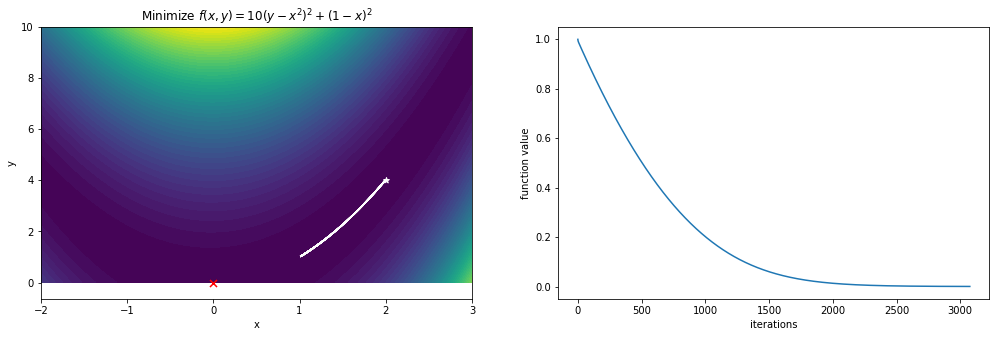

In [35]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -2,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

This solution happens to be too neat. Suppose we increase the step size from $\alpha=0.005$ to $\alpha=0.01$, and the trajectory of the solution gets weird.

In [36]:
p, f = steepestdescent(objfun, gradient, init=[2,4], steplength=0.01)

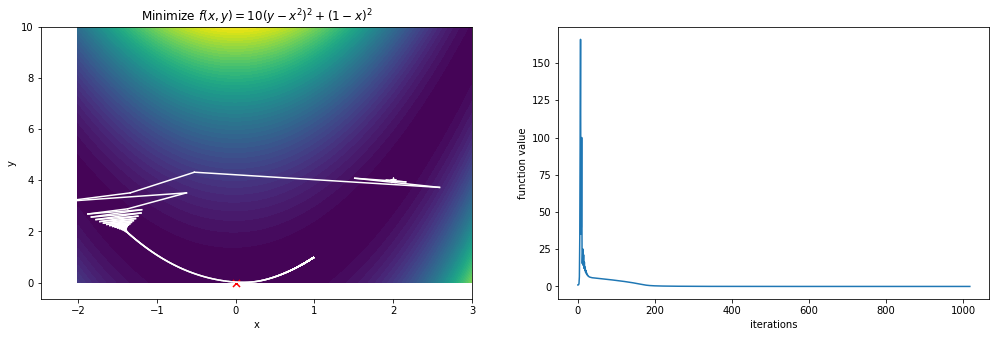

In [37]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -2,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");

Now the step size is larger, so the new position ends up in a location where the gradient is larger. Therefore the next step is even larger, and we observe a large jump across the middle hill. There the steps get smaller again, and the solution approaches the global minimum from the back.

Try a different starting location, where the gradient is larger. Now, the same $\alpha$ is too large; the step size increases at each iteration and the calculation blows up.

In [39]:
p, f = steepestdescent(objfun, gradient, init=[2,6], steplength=0.01)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


We see that the function value increases rapidly at each iteration. The algorithm is unstable.

In [40]:
f

array([4.10000000e+001, 5.27420690e+002, 1.54833097e+004, 1.00724987e+009,
       2.62121730e+023, 4.61051088e+066, 2.50892176e+196,             inf,
                   inf])

However, when $\alpha$ is decreased to $0.005$ again, we see that the solution converges after some oscillations.

In [41]:
p, f = steepestdescent(objfun, gradient, init=[2,6], steplength=0.005)

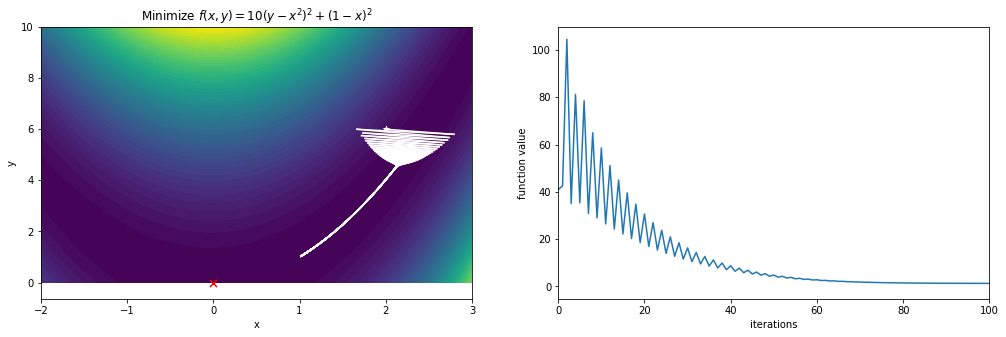

In [42]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -2,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlim(0,100)
plt.xlabel("iterations")
plt.ylabel("function value");

In general, the convergence depends sensitively on the $\alpha$ value as well as the local gradient value at the initial position. You can play with various initial positions and step lengths to see how it works.

Tip: By trial and error, try to find parameter values that are very close to being unstable - they give you crazy paths. For example: 

In [43]:
p, f = steepestdescent(objfun, gradient, init=[2,5.1155], steplength=0.01)

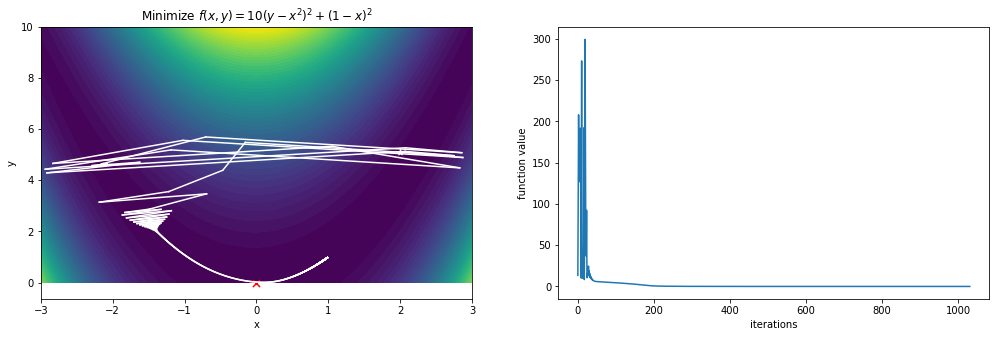

In [44]:
plt.figure(figsize=(17,5))
plt.subplot(1,2,1)
contourplot(objfun, -3,3,0,10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Minimize $f(x,y)=10(y-x^2)^2 + (1-x)^2$");
plt.scatter(p[0,0],p[0,1],marker="*",color="w")
for i in range(1,len(p)):    
        plt.plot( (p[i-1,0],p[i,0]), (p[i-1,1],p[i,1]) , "w");

plt.subplot(1,2,2)
plt.plot(f)
plt.xlabel("iterations")
plt.ylabel("function value");